In [2]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 'src']


In [4]:
MAIN_DIR = "/Users/gbibim/Here/genZ/data"
#dir_name = "children" #"new"  # data for older samples new for the files with lhe variables
dir_name = "PNetchildren" 
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": {
        #"LO": [
        #    "Zto2Q-4Jets_HT-200to400",
        #    "Zto2Q-4Jets_HT-400to600",
        #    "Zto2Q-4Jets_HT-600to800",
        #    "Zto2Q-4Jets_HT-800",
        #],
        "NLO": [
            "Zto2Q-2Jets_PTQQ-100to200_1J",
            "Zto2Q-2Jets_PTQQ-100to200_2J",
            "Zto2Q-2Jets_PTQQ-200to400_1J",
            "Zto2Q-2Jets_PTQQ-200to400_2J",
            "Zto2Q-2Jets_PTQQ-400to600_1J",
            "Zto2Q-2Jets_PTQQ-400to600_2J",
            "Zto2Q-2Jets_PTQQ-600_1J",
            "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    },
    #"Zto2Nu": {
    #    "LO": [
    #        "Zto2Nu-4Jets_HT-100to200",
    #        "Zto2Nu-4Jets_HT-200to400",
    #        "Zto2Nu-4Jets_HT-400to800",
    #        "Zto2Nu-4Jets_HT-800to1500",
    #    ],
    #    "NLO": [
    #        "Zto2Nu-2Jets_PTNuNu-100to200_1J",
    #        "Zto2Nu-2Jets_PTNuNu-100to200_2J",
    #        "Zto2Nu-2Jets_PTNuNu-200to400_1J",
    #        "Zto2Nu-2Jets_PTNuNu-200to400_2J",
    #        "Zto2Nu-2Jets_PTNuNu-400to600_1J",
    #        "Zto2Nu-2Jets_PTNuNu-400to600_2J",
    #        "Zto2Nu-2Jets_PTNuNu-600_1J",
    #        "Zto2Nu-2Jets_PTNuNu-600_2J",
    #    ],
    #},
    "Wto2Q": {
        #"LO": [
        #    "Wto2Q-3Jets_HT-200to400",
        #    "Wto2Q-3Jets_HT-400to600",
        #    "Wto2Q-3Jets_HT-600to800",
        #    "Wto2Q-3Jets_HT-800",
        #],
        "NLO": [
            "Wto2Q-2Jets_PTQQ-100to200_1J",
            "Wto2Q-2Jets_PTQQ-100to200_2J",
            "Wto2Q-2Jets_PTQQ-200to400_1J",
            "Wto2Q-2Jets_PTQQ-200to400_2J",
            "Wto2Q-2Jets_PTQQ-400to600_1J",
            "Wto2Q-2Jets_PTQQ-400to600_2J",
            "Wto2Q-2Jets_PTQQ-600_1J",
            "Wto2Q-2Jets_PTQQ-600_2J",
        ],
    },
}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    #("GenVPt", 1),
    ("GenVis_bb", 1),
    ("GenVis_cc", 1),
    ("GenVis_cs", 1),
    ("ak8FatJetmsoftdrop", 2),
    ("ak8FatJetPNetMass", 2),
    #("ak8FatJetPNetTXbb", 2),
    #("ak8FatJetPNetTXjj", 2),
    #("ak8FatJetPNetTXcc", 2),
    #("ak8FatJetPNetQCD", 2),
    #("ak8FatJetPNetTXgg", 2),
    ('ak8FatJetParTPQCD1HF', 2),
    ('ak8FatJetParTPQCD2HF', 2),
    ('ak8FatJetParTPQCD0HF', 2),
    ('ak8FatJetParTPXbb', 2),
    ('ak8FatJetParTPXcc', 2),
    ('ak8FatJetParTPXcs', 2),
    ('ak8FatJetParTPXgg', 2),
    ('ak8FatJetParTPXqq', 2),
]

    


In [5]:
events_dict = {}
# Loop through Zto2Q and ZtoNuNu
for zto, orders in samples.items():
    events_dict[zto] = {}
    # Loop through LO and NLO
    for order, sample_list in orders.items():
        events_dict[zto][order] = {}
        for input_dir, dirs_samples in dirs.items():
            events_dict[zto][order] = {
                **events_dict[zto][order],
                **utils.load_samples(
                    input_dir,
                    zto,
                    sample_list,
                    year,
                    columns=utils.format_columns(load_columns),
                ),
            }

sample_name Zto2Q-2Jets_PTQQ-100to200_1J
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 942 entries
sample_name Zto2Q-2Jets_PTQQ-100to200_2J
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 358821 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_1J
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 2101989 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_2J
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 4993634 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_1J
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 1136172 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_2J
Loading Zto2Q-2Jets_PTQQ-400to600_2J
Loaded Zto2Q-2Jets_PTQQ-400to600_2J                      : 1659970 entries
sample_name Zto2Q-2Jets_PTQQ-600_1J
Loading Zto2Q-2Jets_PTQQ-600_1J
Loaded Zto2Q-2Jets_

In [7]:
events_dict["Zto2Q"]["NLO"]["Zto2Q-2Jets_PTQQ-600_1J"]["finalWeight"]

0          0.001897
1          0.001897
2          0.001897
3          0.001897
4          0.001897
             ...   
1056059    0.001897
1056060   -0.001897
1056061    0.001897
1056062    0.001897
1056063    0.001897
Name: finalWeight, Length: 1056064, dtype: float64

In [8]:
pt_axis = hist.axis.Regular(50, 200, 1000, name="pt", label="Jet $p_T$ [GeV]")
trig_axis = hist.axis.Regular(100, 0, 1, name="trigger", label="Trigger")
msd_axis = hist.axis.Regular(80, 40, 110, name="msd", label="mSD [GeV]")                # Soft Drop Mass
xjj_axis = hist.axis.Regular(80, 0, 1, name="xjj", label="Xbb")                         # Discriminator

sample_axis = hist.axis.StrCategory([], name="name", growth=True)                       #samples
proc_axis = hist.axis.StrCategory([], name="process", growth=True)                      #processes: Zto2Q, QCD, TT, Diboson
order_axis = hist.axis.StrCategory([], name="order", growth=True)                       #order: NLO, LO


In [10]:
import correctionlib
from pathlib import Path
import math
import re
import numpy as np

h_msd = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_bb = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_cc = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_cs = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_rest = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)  

# Discriminators
h_xjj = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xcc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_QCD = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xgg = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_avg = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to bb
h_xjj_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xcc_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_QCD_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xgg_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_avg_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to cc
h_xjj_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xcc_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_QCD_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xgg_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_avg_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to light quarks
h_xjj_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xcc_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_QCD_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xgg_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_avg_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to cs
h_xjj_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xcc_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_QCD_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xgg_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_avg_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)

for zto, orders in events_dict.items():
    #zto = "Zto2Q"
    print (zto)
    #orders = events_dict[zto]
    for order, events in orders.items():
        #order = "LO"
        #events = orders[order]
        for sample in events:
            #sample = "Zto2Q-4Jets_HT-200to400"
            weight = events[sample]["finalWeight"]
            #vpt = events[sample]["GenVPt"][0]
            msd = events[sample]["ak8FatJetmsoftdrop"][0]
            bb = events[sample]["GenVis_bb"][0]
            cc = events[sample]["GenVis_cc"][0]
            cs = events[sample]["GenVis_cs"][0]
            Txjj = events[sample]["ak8FatJetPNetTXjj"][0]
            Txbb = events[sample]["ak8FatJetPNetTXbb"][0]
            Txcc = events[sample]["ak8FatJetPNetTXcc"][0]
            Txgg = events[sample]["ak8FatJetPNetTXgg"][0]
            TQCD = events[sample]["ak8FatJetPNetQCD"][0]
            Tavg = (Txjj+Txcc)/2
            #print(Txjj)
            selection = TQCD>0.3

            #  ALL Z/W 
            #h_vpt.fill(vpt, sample, order, weight=weight)
            h_msd.fill(msd[selection], zto, order, sample, weight=weight[selection])
            h_xjj.fill(Txjj[selection], zto, order, sample, weight=weight[selection])
            h_xbb.fill(Txbb[selection], zto, order, sample, weight=weight[selection])
            h_xcc.fill(Txcc[selection], zto, order, sample, weight=weight[selection])
            h_xgg.fill(Txgg[selection], zto, order, sample, weight=weight[selection])
            h_QCD.fill(TQCD[selection], zto, order, sample, weight=weight[selection]) 
            h_avg.fill(Tavg[selection], zto, order, sample, weight=weight[selection])

            # Z to bb
            h_msd_bb.fill(msd[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xjj_bb.fill(Txjj[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xbb_bb.fill(Txbb[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xcc_bb.fill(Txcc[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xgg_bb.fill(Txgg[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_QCD_bb.fill(TQCD[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_avg_bb.fill(Tavg[bb&selection], zto, order, sample, weight=weight[bb&selection])
            #h_vpt_bb.fill(vpt[bb], sample, order, weight=weight[bb])

            # Z to cc
            h_msd_cc.fill(msd[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xjj_cc.fill(Txjj[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xbb_cc.fill(Txbb[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xcc_cc.fill(Txcc[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xgg_cc.fill(Txgg[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_QCD_cc.fill(TQCD[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_avg_cc.fill(Tavg[cc&selection], zto, order, sample, weight=weight[cc&selection])
            #h_vpt_cc.fill(vpt[cc], sample, order, weight=weight[cc])

            # W to cs
            h_msd_cs.fill(msd[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xjj_cs.fill(Txjj[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xbb_cs.fill(Txbb[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xcc_cs.fill(Txcc[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xgg_cs.fill(Txgg[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_QCD_cs.fill(TQCD[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_avg_cs.fill(Tavg[cs&selection], zto, order, sample, weight=weight[cs&selection])

            # Everything else
            h_msd_rest.fill(msd[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xjj_rest.fill(Txjj[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xbb_rest.fill(Txbb[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xcc_rest.fill(Txcc[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xgg_rest.fill(Txgg[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_QCD_rest.fill(TQCD[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_avg_rest.fill(Tavg[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            

Zto2Q
Wto2Q


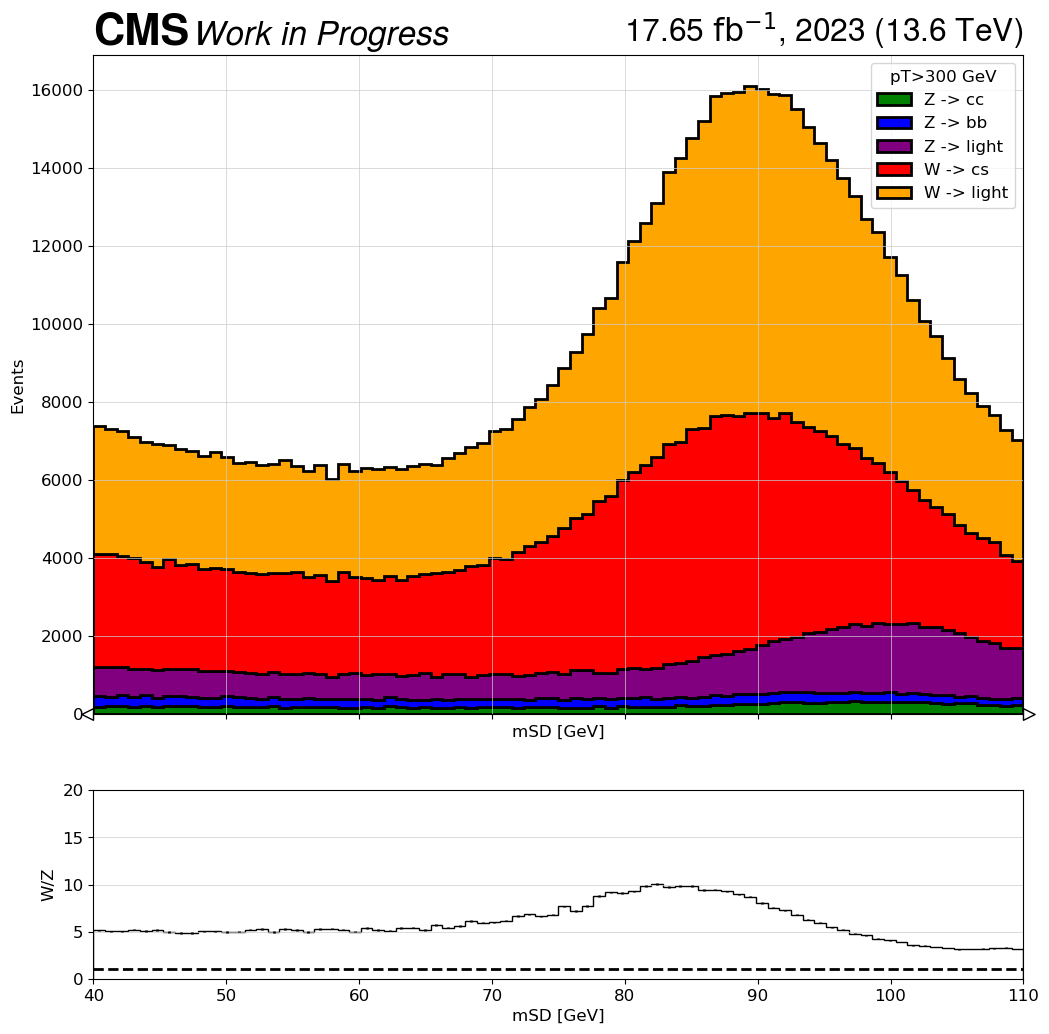

In [11]:

from hist.intervals import ratio_uncertainty

h_z_bb = h_msd_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_msd_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_msd_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_msd_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_msd_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]


#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends, color=colors, density=False, histtype="fill", edgecolor="black",
linewidth=2) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_msd[{"process":sum, "order":"NLO", "name": sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data", density=True)
ax.legend()
#ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(40, 110)
ax.set_xlabel("mSD [GeV]")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )
# 2nd panel
h_z = h_msd[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w = h_msd[{"process":"Wto2Q", "order":"NLO", "name": sum}]
bg_total = h_z ## , h_qcd, h_diboson, h_tt     Z
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_w.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="step", color="black")
rax.set_ylabel("W/Z")
rax.set_ylim(0, 20)
rax.set_xlabel("mSD [GeV]")
rax.set_xlim(40, 110)
rax.grid(axis="y")
rax.axhline(1, color="black", linestyle="--")
plt.show()

#plt.show()